# Laboratorio 3
### Javier Mombiela 20067
### Roberto Rios 200769

#### Importando Librerias

In [163]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM, SimpleRNN, BatchNormalization

#### Funciones para definir las arquitecturas

In [164]:
# create_FNNN: funcion que define la arquitectura de la red neuronal feed forward
def create_FFNN(hidden_units, input_shape, activation):
    model = Sequential([
        Dense(hidden_units[0], input_shape=input_shape, activation=activation[0]),
        BatchNormalization(),
        Dense(hidden_units[1], activation=activation[1]),
        BatchNormalization(),
        Dense(hidden_units[2], activation=activation[2]),
        BatchNormalization(),
        Dense(1, activation=activation[3])
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
    return model

# create_RNN: funcion que crea una red neuronal recurrente
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(
        hidden_units
        , input_shape=input_shape
        , activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
    return model

# create_LSTM: función que crea una red neuronal LSTM
def create_LSTM(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(LSTM(
        hidden_units,
        input_shape=input_shape,
        activation=activation[0]
    ))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
    return model

##### Funciones para obtener los datos

In [165]:
# get_train_test: funcion que obtiene los datos de entrenamiento y prueba
def get_train_test(dataset, split_percent=0.8):
    df = pd.read_csv(dataset, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data

# get_XY: funcion que obtiene los datos de entrada y salida
def get_XY(dat, time_steps=None):
    if time_steps is None:
        X = dat[:-1]  # Todas las muestras excepto la última
        Y = dat[1:]   # Todas las muestras excepto la primera
    else:
        Y_ind = np.arange(time_steps, len(dat), time_steps)
        Y = dat[Y_ind]
        rows_x = len(Y)
        X = dat[range(time_steps * rows_x)]
        X = np.reshape(X, (rows_x, time_steps, 1))
    return X, Y

#### Funciones para graficar los resultados

In [166]:
# print_error: imprime el error de las predicciones
def print_error(trainY, testY, train_predict, test_predict):    
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    

# plot_result: grafica los resultados
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')

#### Obtenemos la data

In [167]:
# definimos los datos de entrenamiento y test
train_data, test_data, data = get_train_test('sunspots.csv')

# definimos el numero de pasos de tiempo
time_steps = 12

# Datos para el modelo FFNN (sin pasos de tiempo)
trainX_ffnn, trainY_ffnn = get_XY(train_data)
testX_ffnn, testY_ffnn = get_XY(test_data)

# Datos para el modelo RNN
trainX_rnn, trainY_rnn = get_XY(train_data, time_steps)
testX_rnn, testY_rnn = get_XY(test_data, time_steps)

# Datos para el modelo LSTM
trainX_lstm, trainY_lstm = get_XY(train_data, time_steps)
testX_lstm, testY_lstm = get_XY(test_data, time_steps)

#### 1. Feed Forward Neural Network (FFNN)

In [168]:
# creamos el modelo
modelo_ffnn = create_FFNN(
    hidden_units= [64, 128, 64], 
    input_shape= (1,),   
    activation = ['relu', 'relu', 'relu', 'linear'],
)
modelo_ffnn.fit(trainX_ffnn, trainY_ffnn, epochs=20, batch_size=32, verbose=2)

Epoch 1/20
71/71 - 2s - loss: 0.0739 - mse: 0.0739 - 2s/epoch - 35ms/step
Epoch 2/20
71/71 - 0s - loss: 0.0115 - mse: 0.0115 - 150ms/epoch - 2ms/step
Epoch 3/20
71/71 - 0s - loss: 0.0097 - mse: 0.0097 - 141ms/epoch - 2ms/step
Epoch 4/20
71/71 - 0s - loss: 0.0079 - mse: 0.0079 - 148ms/epoch - 2ms/step
Epoch 5/20
71/71 - 0s - loss: 0.0081 - mse: 0.0081 - 145ms/epoch - 2ms/step
Epoch 6/20
71/71 - 0s - loss: 0.0084 - mse: 0.0084 - 196ms/epoch - 3ms/step
Epoch 7/20
71/71 - 0s - loss: 0.0069 - mse: 0.0069 - 191ms/epoch - 3ms/step
Epoch 8/20
71/71 - 0s - loss: 0.0072 - mse: 0.0072 - 191ms/epoch - 3ms/step
Epoch 9/20
71/71 - 0s - loss: 0.0061 - mse: 0.0061 - 147ms/epoch - 2ms/step
Epoch 10/20
71/71 - 0s - loss: 0.0062 - mse: 0.0062 - 180ms/epoch - 3ms/step
Epoch 11/20
71/71 - 0s - loss: 0.0060 - mse: 0.0060 - 155ms/epoch - 2ms/step
Epoch 12/20
71/71 - 0s - loss: 0.0060 - mse: 0.0060 - 144ms/epoch - 2ms/step
Epoch 13/20
71/71 - 0s - loss: 0.0060 - mse: 0.0060 - 145ms/epoch - 2ms/step
Epoch 14/2

18/18 [==============================] - 0s 1ms/step
Train RMSE: 0.155 RMSE
Test RMSE: 0.139 RMSE


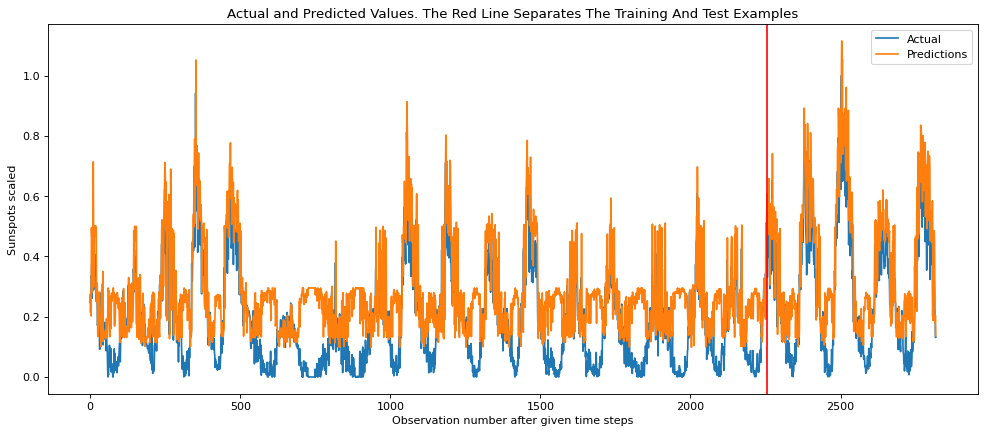

In [169]:
# hacemos predicciones
train_predict_FFNN = modelo_ffnn.predict(trainX_ffnn)
test_predict_FFNN = modelo_ffnn.predict(testX_ffnn)

# imprimimos el error
print_error(trainY_ffnn, testY_ffnn, train_predict_FFNN, test_predict_FFNN)

# graficamos los resultados de la red neuronal
plot_result(trainY_ffnn, testY_ffnn, train_predict_FFNN, test_predict_FFNN)

#### 2. Recurrent Neural Network (RNN)

In [170]:
# definimos el modelo de la red RNN
modelo_rnn = create_RNN(
    hidden_units=3
    , dense_units=1
    , input_shape=(time_steps,1)
    , activation=['tanh', 'tanh']
)
modelo_rnn.fit(trainX_rnn, trainY_rnn, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
187/187 - 2s - loss: 0.0189 - mse: 0.0189 - 2s/epoch - 8ms/step
Epoch 2/20
187/187 - 0s - loss: 0.0140 - mse: 0.0140 - 363ms/epoch - 2ms/step
Epoch 3/20
187/187 - 0s - loss: 0.0125 - mse: 0.0125 - 376ms/epoch - 2ms/step
Epoch 4/20
187/187 - 0s - loss: 0.0106 - mse: 0.0106 - 360ms/epoch - 2ms/step
Epoch 5/20
187/187 - 0s - loss: 0.0093 - mse: 0.0093 - 363ms/epoch - 2ms/step
Epoch 6/20
187/187 - 0s - loss: 0.0090 - mse: 0.0090 - 359ms/epoch - 2ms/step
Epoch 7/20
187/187 - 0s - loss: 0.0081 - mse: 0.0081 - 364ms/epoch - 2ms/step
Epoch 8/20
187/187 - 0s - loss: 0.0076 - mse: 0.0076 - 362ms/epoch - 2ms/step
Epoch 9/20
187/187 - 0s - loss: 0.0071 - mse: 0.0071 - 359ms/epoch - 2ms/step
Epoch 10/20
187/187 - 0s - loss: 0.0066 - mse: 0.0066 - 356ms/epoch - 2ms/step
Epoch 11/20
187/187 - 0s - loss: 0.0063 - mse: 0.0063 - 363ms/epoch - 2ms/step
Epoch 12/20
187/187 - 0s - loss: 0.0061 - mse: 0.0061 - 360ms/epoch - 2ms/step
Epoch 13/20
187/187 - 0s - loss: 0.0059 - mse: 0.0059 - 358ms/ep

2/2 [==============================] - 0s 2ms/step
Train RMSE: 0.069 RMSE
Test RMSE: 0.103 RMSE


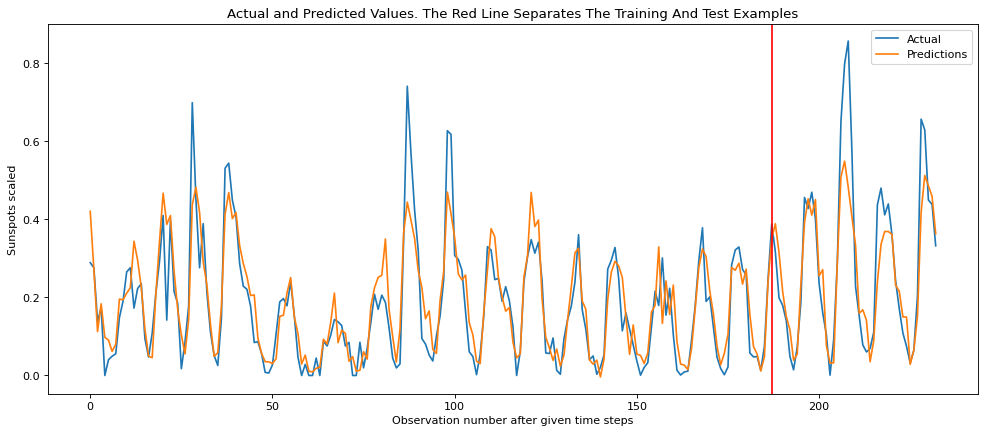

In [171]:
# hacemos predicciones
train_predict_RNN = modelo_rnn.predict(trainX_rnn)
test_predict_RNN = modelo_rnn.predict(testX_rnn)

# imprimimos el error
print_error(trainY_rnn, testY_rnn, train_predict_RNN, test_predict_RNN)

# graficamos los resultados de la red neuronal
plot_result(trainY_rnn, testY_rnn, train_predict_RNN, test_predict_RNN)

#### 3. Long Short-Term Memory (LSTM)

In [172]:
# Definimos el modelo de la red LSTM
modelo_lstm = create_LSTM(
    hidden_units=3,
    dense_units=1,
    input_shape=(time_steps, 1),
    activation=['tanh', 'tanh']
)
modelo_lstm.fit(trainX_lstm, trainY_lstm, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
187/187 - 3s - loss: 0.0144 - mse: 0.0144 - 3s/epoch - 15ms/step
Epoch 2/20
187/187 - 1s - loss: 0.0074 - mse: 0.0074 - 512ms/epoch - 3ms/step
Epoch 3/20
187/187 - 1s - loss: 0.0064 - mse: 0.0064 - 509ms/epoch - 3ms/step
Epoch 4/20
187/187 - 1s - loss: 0.0060 - mse: 0.0060 - 511ms/epoch - 3ms/step
Epoch 5/20
187/187 - 1s - loss: 0.0055 - mse: 0.0055 - 508ms/epoch - 3ms/step
Epoch 6/20
187/187 - 1s - loss: 0.0053 - mse: 0.0053 - 510ms/epoch - 3ms/step
Epoch 7/20
187/187 - 1s - loss: 0.0052 - mse: 0.0052 - 507ms/epoch - 3ms/step
Epoch 8/20
187/187 - 1s - loss: 0.0050 - mse: 0.0050 - 508ms/epoch - 3ms/step
Epoch 9/20
187/187 - 1s - loss: 0.0049 - mse: 0.0049 - 507ms/epoch - 3ms/step
Epoch 10/20
187/187 - 1s - loss: 0.0048 - mse: 0.0048 - 507ms/epoch - 3ms/step
Epoch 11/20
187/187 - 1s - loss: 0.0047 - mse: 0.0047 - 507ms/epoch - 3ms/step
Epoch 12/20
187/187 - 1s - loss: 0.0046 - mse: 0.0046 - 508ms/epoch - 3ms/step
Epoch 13/20
187/187 - 1s - loss: 0.0046 - mse: 0.0046 - 515ms/e

2/2 [==============================] - 0s 2ms/step
Train RMSE: 0.063 RMSE
Test RMSE: 0.098 RMSE


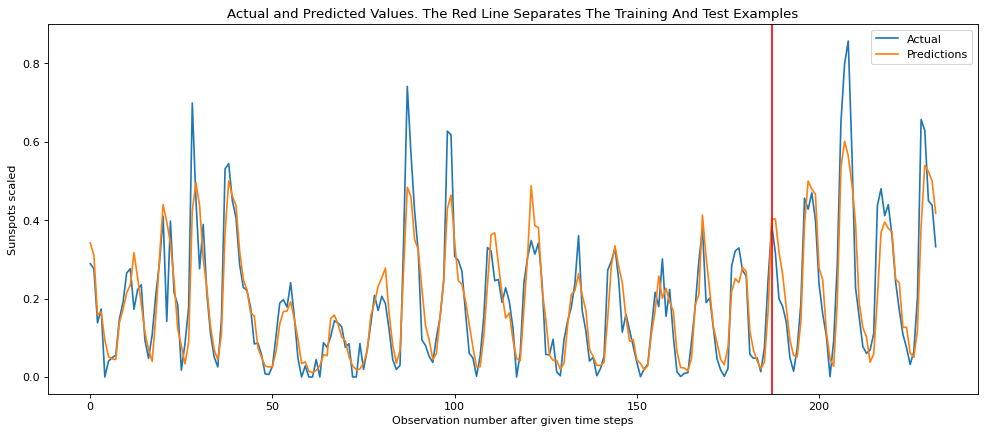

In [173]:
# hacemos predicciones
train_predict_LSTM = modelo_lstm.predict(trainX_lstm)
test_predict_LSTM = modelo_lstm.predict(testX_lstm)

# imprimimos el error
print_error(trainY_lstm, testY_lstm, train_predict_LSTM, test_predict_LSTM)

# graficamos los resultados de la red neuronal
plot_result(trainY_lstm, testY_lstm, train_predict_LSTM, test_predict_LSTM)

#### Comparando resultados

In [174]:
# Calcular los RMSE para cada modelo en el conjunto de prueba
test_rmse_FFNN = math.sqrt(mean_squared_error(testY_ffnn, test_predict_FFNN))
test_rmse_RNN = math.sqrt(mean_squared_error(testY_rnn, test_predict_RNN))
test_rmse_LSTM = math.sqrt(mean_squared_error(testY_lstm, test_predict_LSTM))

# Imprimir los resultados
print("RMSE en el conjunto de prueba:")
print("FFNN :", test_rmse_FFNN)
print("RNN  :", test_rmse_RNN)
print("LSTM :", test_rmse_LSTM)

# Comparar los RMSE de los modelos
best_model = min(test_rmse_FFNN, test_rmse_RNN, test_rmse_LSTM)
print("\nEl mejor modelo en el conjunto de prueba es:")
if best_model == test_rmse_FFNN:
    print("FFNN")
elif best_model == test_rmse_RNN:
    print("RNN")
else:
    print("LSTM")

RMSE en el conjunto de prueba:
FFNN : 0.13924839501551758
RNN  : 0.10300140596733387
LSTM : 0.09796712508215354

El mejor modelo en el conjunto de prueba es:
LSTM


### Discusión

El problema que se esta buscando resolver es un problema de regresión, ya que se esta tratando de predecir un valor numérico (la cantidad de manchas solares) en función de una variable de entrada (el mes). En este caso, dado que se esta trabajando con una serie temporal (los valores están ordenados en función del tiempo) sería más adecuado utilizar una red neuronal que pueda capturar las dependencias secuenciales en los datos. Los modelos que se utilizaron fueron los siguientes: Feed Forward Neural Network (FFNN), Recurrent Neural Network (RNN) y Long Short-Term Memory (LSTM). 
 
**Pros y Contras**

1. FFNN: El modelo FFNN es una red simple, por lo cual es facil de implementar y entender. Esta red también es capaz de funcionar bien en problemas de regresión más simples. Pero por el otro lado, ya que esta red es un modelo simple, también tiene sus limitaciones. El modelo FFNN no modela muy adecuadamente las relaciones temporales en series temporales, y tampoco es capaz de recordar eventos pasados o patrones a largo plazo en los datos. 

2. RNN: El modelo RNN es una mejora, ya que este sí es capaz de capturar dependencias secuenciales de los datos. Este modelo también tiene conexiones recurrentes que permiten que la información fluya a través del tiempo, lo que lo hace adecuado para modelar las relaciones temporales y patrones a corto plazo en los datos. Pero este modelo tampoco es perfecto ya que también tiene ciertas limitaciones, ya que tiene dificultades para capturar relaciones a largo plazo en las secuencias. Debido a su estructura de corto plazo, estas redes también pueden tener dificultades para capturar patrones en secuencias muy largas. 

3. LSTM: Por último, tenemos el modelo LSTM, el cual es diseñado especialmente para superar las limitaciones de las RNN en la captura de dependencias a largo y corto plazo en las secuencias temporales. Este modelo también puede capturar patrones a largo plazo en los datos de series temporales y logra conservar la información durante períodos prolongados. Pero este modelo tampoco es perfecto, ya que puede ser más difícil de entender e implementar y también puede haber problemas de sobre ajuste si no se configura adecuadamente. 

Como se puede observar en los resultados, el orden de mejor a peor modelo es el siguiente: LSTM, RNN y por último FFNN. En casi todas las iteraciones, el modelo LSTM fue el mejor modelo, en algunas fue el modelo RNN, pero el modelo FFNN, siempre fue el peor de los tres modelos. 

### Conclusión

Tomando en cuenta los resultados obtenidos y las ventajas que presentan las distintas arquitecturas, podemos concluir que la mejor opción para resolver el problema de predecir la cantidad de manchas solares en una serie temporal es mediante el uso de la arquitectura de **Long Short-Term Memory (LSTM)**. A pesar de su mayor nivel de complejidad, las LSTMs se destacan por su capacidad para capturar patrones tanto a corto como a largo plazo en los datos de series temporales, lo que le da la ventaja sobre las RNN. Esta superioridad se refleja en el valor más bajo de RMSE en la evaluación con el conjunto de prueba.

El conjunto de datos *sunspots.csv* representa una serie temporal en la que es crucial capturar tanto las conexiones temporales de corta duración como las de largo alcance que influyen en las manchas solares. La elección de la red neuronal LSTM resulta especialmente apropiada en este contexto. Las LSTMs también destacan por su capacidad de modelar patrones intricados a lo largo del tiempo, lo cual las convierte en una elección sólida y confiable para este tipo de datos y problema.
